In [47]:
import pandas as pd
from sklearn import tree, metrics, model_selection
import numpy as np
import graphviz

In [2]:
df = pd.read_csv('./data/Impact_of_Remote_Work_on_Mental_Health.csv')

In [3]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [36]:
desired_columns = ['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 
                   'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 
                   'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work',
                   'Stress_Level'
                    ]

sub_df = df.loc[df.Work_Location == 'Remote', desired_columns]

In [54]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [37]:
new_stisfaction = np.empty_like(sub_df.Satisfaction_with_Remote_Work)
new_stisfaction[sub_df.Satisfaction_with_Remote_Work == 'Satisfied'] = 1
new_stisfaction[sub_df.Satisfaction_with_Remote_Work == 'Neutral'] = 0
new_stisfaction[sub_df.Satisfaction_with_Remote_Work == 'Unsatisfied'] = -1

sub_df.Satisfaction_with_Remote_Work = new_stisfaction.reshape(-1, 1)

sub_df

,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Stress_Level
1,52,4,1,3,1,2,Medium
6,51,7,3,5,0,3,Low
10,48,3,3,4,1,2,High
12,21,7,2,2,0,1,High
14,59,11,3,5,0,3,High
...,...,...,...,...,...,...,...
4972,25,5,2,5,-1,3,Low
4974,22,5,4,3,0,3,Low
4977,49,7,5,5,-1,5,Medium
4988,26,0,5,3,0,3,Medium


Split the dataset into training, testing set of features and labels

In [44]:
features = sub_df[sub_df.columns[:-1]]
labels = sub_df[sub_df.columns[-1]]

In [55]:
decision_tree = clf.fit(features.loc[:4000], labels.loc[:4000])

In [52]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                     feature_names=features.loc[:4000].columns.to_list(),
                     class_names=list(labels.loc[:4000].values.reshape(-1,)),
                     filled=True, rounded=True,
                     special_characters=True
            )

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

[Text(0.5882352941176471, 0.9166666666666666, 'x[2] <= 4.5\nentropy = 1.583\nsamples = 1395\nvalue = [490, 430, 475]'),
 Text(0.3137254901960784, 0.75, 'x[5] <= 4.5\nentropy = 1.58\nsamples = 1113\nvalue = [384, 330, 399]'),
 Text(0.1568627450980392, 0.5833333333333334, 'x[5] <= 3.5\nentropy = 1.575\nsamples = 892\nvalue = [305, 252, 335]'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[0] <= 51.5\nentropy = 1.575\nsamples = 669\nvalue = [245, 187, 237]'),
 Text(0.0392156862745098, 0.25, 'x[3] <= 2.5\nentropy = 1.578\nsamples = 540\nvalue = [185, 156, 199]'),
 Text(0.0196078431372549, 0.08333333333333333, 'entropy = 1.571\nsamples = 228\nvalue = [66, 71, 91]'),
 Text(0.058823529411764705, 0.08333333333333333, 'entropy = 1.571\nsamples = 312\nvalue = [119, 85, 108]'),
 Text(0.11764705882352941, 0.25, 'x[1] <= 7.5\nentropy = 1.527\nsamples = 129\nvalue = [60, 31, 38]'),
 Text(0.09803921568627451, 0.08333333333333333, 'entropy = 1.434\nsamples = 65\nvalue = [36, 13, 16]'),
 Text(0.1372

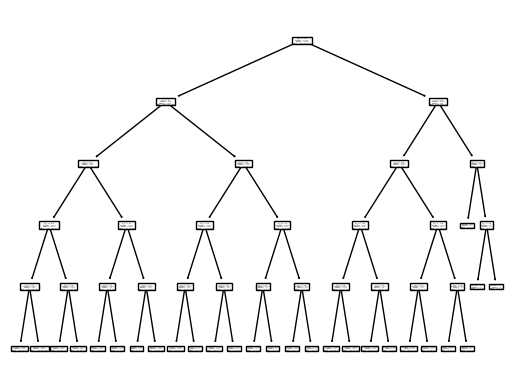

In [56]:
tree.plot_tree(decision_tree)